In [1]:
!pip install torch torchvision pillow
# 📚 Импорт библиотек
import boto3
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
from torchvision import transforms
from PIL import Image
import io

# 📂 Настройки
bucket_name = 'awsmidterm'
source_prefix = 'source/'
target_prefix_cat = 'cat/'
target_prefix_dog = 'dog/'
target_prefix_other = 'other/'

# 📦 Инициализация клиентов
s3 = boto3.client('s3')

# 🧠 Загрузка модели
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn(weights=weights)
model.eval()

COCO_CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A',
    'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'N/A',
    'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# 🚀 Загрузка списка файлов из S3
response = s3.list_objects_v2(Bucket=bucket_name, Prefix=source_prefix)

if 'Contents' not in response:
    print("❌ Нет файлов в папке source/")
else:
    for obj in response['Contents']:
        key = obj['Key']
        
        if key.endswith(".jpg") or key.endswith(".png"):
            print(f"📄 Обрабатываем файл: {key}")

            # Скачиваем изображение
            img_obj = s3.get_object(Bucket=bucket_name, Key=key)
            img_data = img_obj['Body'].read()
            image = Image.open(io.BytesIO(img_data)).convert('RGB')
            
            # Преобразуем
            transform = transforms.ToTensor()
            img_tensor = transform(image).unsqueeze(0)
            
            # Инференс
            with torch.no_grad():
                prediction = model(img_tensor)[0]
            
            labels = prediction['labels']
            scores = prediction['scores']
            
            detected_classes = []
            for label, score in zip(labels, scores):
                if score > 0.7:
                    class_name = COCO_CLASSES[label.item()]
                    if class_name in ['cat', 'dog']:
                        detected_classes.append(class_name)
            
            # Определение, куда сохранить
            if 'cat' in detected_classes and 'dog' in detected_classes:
                target_key = target_prefix_cat + key.split('/')[-1]
                s3.put_object(Bucket=bucket_name, Key=target_key, Body=img_data)
                target_key = target_prefix_dog + key.split('/')[-1]
                s3.put_object(Bucket=bucket_name, Key=target_key, Body=img_data)
                print("✅ Найдены и кот, и собака. Сохранено в обе папки.")
            elif 'cat' in detected_classes:
                target_key = target_prefix_cat + key.split('/')[-1]
                s3.put_object(Bucket=bucket_name, Key=target_key, Body=img_data)
                print("✅ Найден кот. Сохранено в cat/")
            elif 'dog' in detected_classes:
                target_key = target_prefix_dog + key.split('/')[-1]
                s3.put_object(Bucket=bucket_name, Key=target_key, Body=img_data)
                print("✅ Найдена собака. Сохранено в dog/")
            else:
                target_key = target_prefix_other + key.split('/')[-1]
                s3.put_object(Bucket=bucket_name, Key=target_key, Body=img_data)
                print("❌ Кот или собака не найдены. Сохранено в other/")

    print("🎯 Все изображения обработаны!")


📄 Обрабатываем файл: source/0.jpg
✅ Найдена собака. Сохранено в dog/
📄 Обрабатываем файл: source/1.jpg
✅ Найдена собака. Сохранено в dog/
📄 Обрабатываем файл: source/10.jpg
✅ Найдена собака. Сохранено в dog/
📄 Обрабатываем файл: source/11.jpg
❌ Кот или собака не найдены. Сохранено в other/
📄 Обрабатываем файл: source/12.jpg
❌ Кот или собака не найдены. Сохранено в other/
📄 Обрабатываем файл: source/13.jpg
✅ Найдена собака. Сохранено в dog/
📄 Обрабатываем файл: source/14.jpg
✅ Найдена собака. Сохранено в dog/
📄 Обрабатываем файл: source/15.jpg
✅ Найдена собака. Сохранено в dog/
📄 Обрабатываем файл: source/16.jpg
✅ Найдена собака. Сохранено в dog/
📄 Обрабатываем файл: source/17.jpg
✅ Найдена собака. Сохранено в dog/
📄 Обрабатываем файл: source/18.jpg
✅ Найдена собака. Сохранено в dog/
📄 Обрабатываем файл: source/19.jpg
✅ Найдена собака. Сохранено в dog/
📄 Обрабатываем файл: source/2.jpg
✅ Найдена собака. Сохранено в dog/
📄 Обрабатываем файл: source/20.jpg
✅ Найдена собака. Сохранено в do

In [2]:
!pip install matplotlib pandas


Matplotlib is building the font cache; this may take a moment.


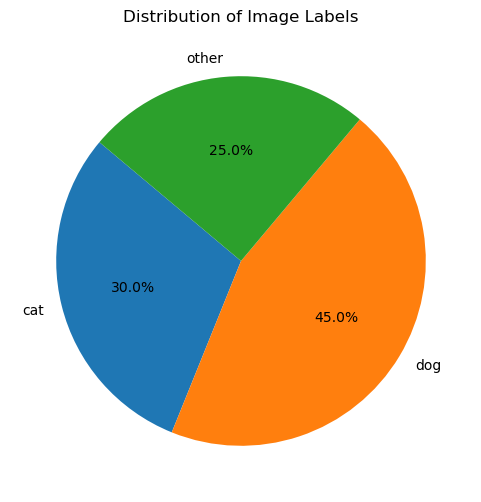

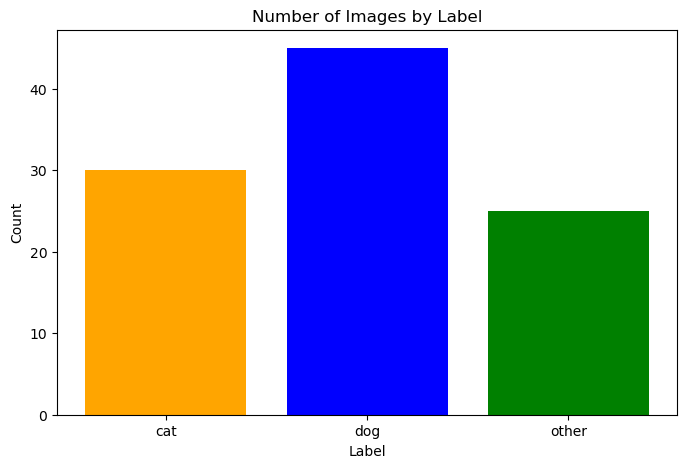

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузи данные (можно скачать CSV из Athena или считать вручную)
data = {
    'label': ['cat', 'dog', 'other'],
    'count': [30, 45, 25]
}
df = pd.DataFrame(data)

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(df['count'], labels=df['label'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Image Labels')
plt.show()

# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(df['label'], df['count'], color=['orange', 'blue', 'green'])
plt.title('Number of Images by Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()
